https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data
https://www.kaggle.com/datasets/gauravtopre/credit-card-defaulter-prediction
https://archive.ics.uci.edu/dataset/573/south+german+credit+update
https://www.kaggle.com/datasets/sid321axn/south-german-credit-updated/data

In [6]:
import pandas as pd

df = pd.read_csv("data/german_credit.csv")

In [7]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Categorias para '{column}':\n")
    print(df[column].value_counts())
    print("\n" + "-"*50 + "\n")  

Categorias para 'status':

status
... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: count, dtype: int64

--------------------------------------------------

Categorias para 'credit_history':

credit_history
no credits taken/all credits paid back duly    530
all credits at this bank paid back duly        293
existing credits paid back duly till now        88
critical account/other credits elsewhere        49
delay in paying off in the past                 40
Name: count, dtype: int64

--------------------------------------------------

Categorias para 'purpose':

purpose
furniture/equipment    280
others                 234
car (used)             181
car (new)              103
retraining              97
repairs                 50
domestic appliances     22
business                12
radio/television        12
vacation                

Tipo de Variable -Método de Tratamiento (a prior)
- Variables Ordinales Discretizadas Cuantitativas: Considerarlas como categóricas y aplicar OneHotEncoder o OrdinalEncoder si siguen un orden claro
- Variables Categoricas: OneHotEncoder
- Variables Numericas: StandardScaler

In [12]:
df.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


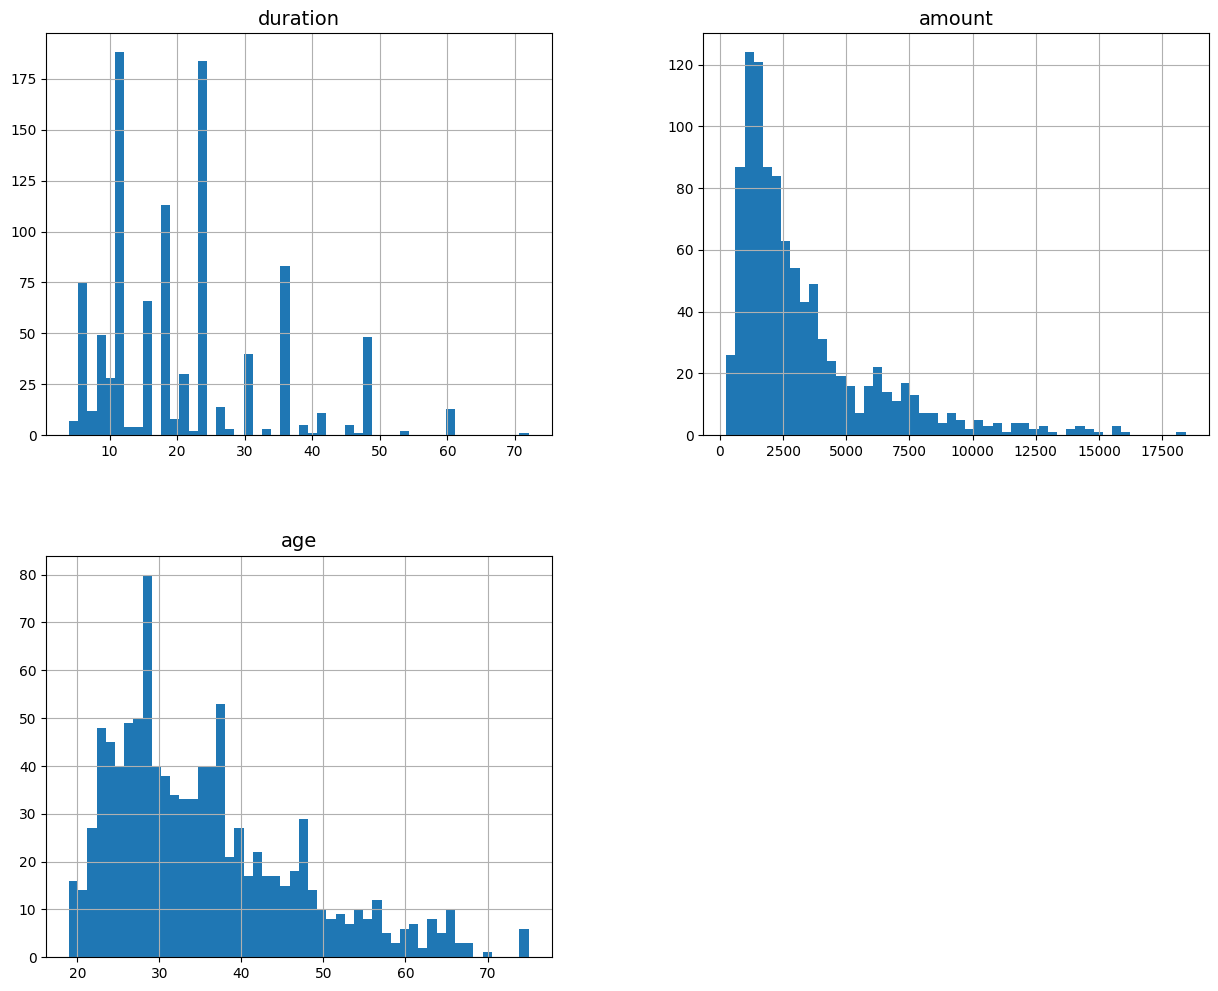

In [13]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(15,12))
plt.show()

## Create a Test Set 

Stratified Sampling

In [44]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    df, test_size=0.2, stratify=df["credit_risk"], random_state=42)

SMOTE (Synthetic Minority Over-sampling Technique)

In [45]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train = train_set.drop('credit_risk', axis=1)
y_train = train_set['credit_risk']  

X_train_50, y_train_50 = ros.fit_resample(X_train, y_train)

In [46]:
def credit_risk_proportions(data):
    return data["credit_risk"].value_counts() / len(data)

smote = (y_train_50.value_counts() / len(y_train_50)).astype(float)

compare_props = pd.DataFrame({
    "Overall %": credit_risk_proportions(df),
    "Stratified %": credit_risk_proportions(test_set),
    "SMOTE %": smote,
}).sort_index()
compare_props.index.name = "Credit Risk"
(compare_props * 100).round(2)

,Overall %,Stratified %,SMOTE %
Credit Risk,,,
bad,30.0,30.0,50.0
good,70.0,70.0,50.0


We'll start using the stratified sample and comeback to the SMOTE sample in the event we need more "bad" category data to train our classifier.

## Discover and Visualize the Data to Gain Insights

In [47]:
credit = train_set.copy()

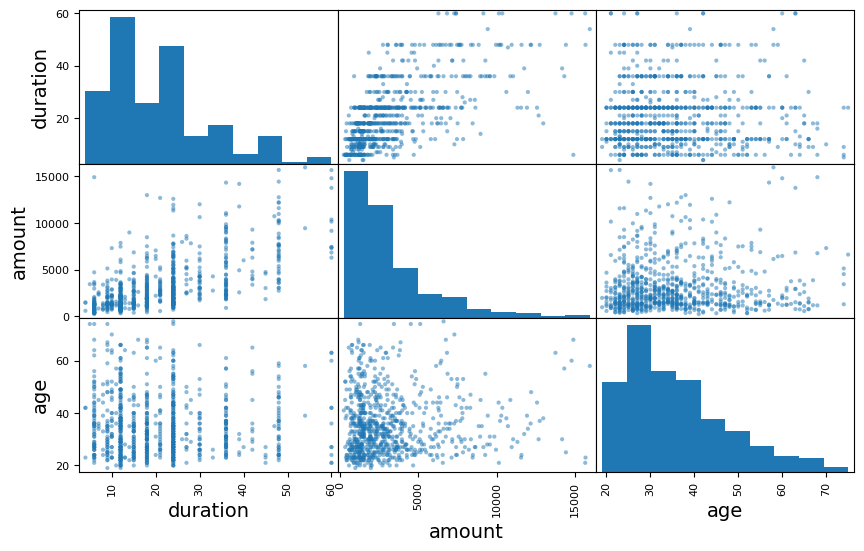

In [52]:
from pandas.plotting import scatter_matrix

numerical_columns = credit.select_dtypes(include=['int64']).columns
scatter_matrix(credit[numerical_columns], figsize=(10, 6))

plt.show()

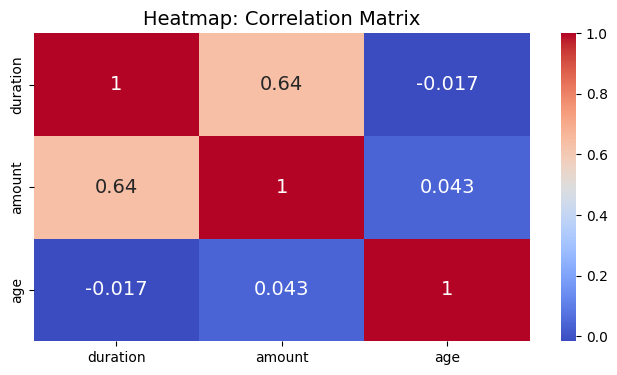

In [54]:
import seaborn as sns

correlation_matrix = credit[numerical_columns].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()

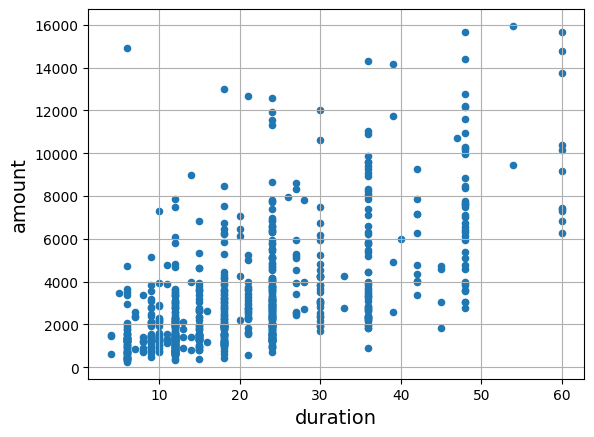

In [57]:
credit.plot(kind="scatter", x="duration", y="amount",
            grid=True)
plt.show()

## Prepare the Data for Machine Learning Algorithms

In [58]:
credit = train_set.drop("credit_risk", axis=1)
credit_label = train_set["credit_risk"].copy()

### Data Cleaning